In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

In [70]:
# Подгружаем датасет на другие даты и прогноз по нему 

forecast = pd.read_csv('../data/result.csv')
in_df = pd.read_csv('../data/secret.csv')

In [71]:
grouped = in_df.groupby(in_df.date)['target'].sum()


In [72]:
# Сгруппируем фактические значения для сравнения
target_fact = grouped

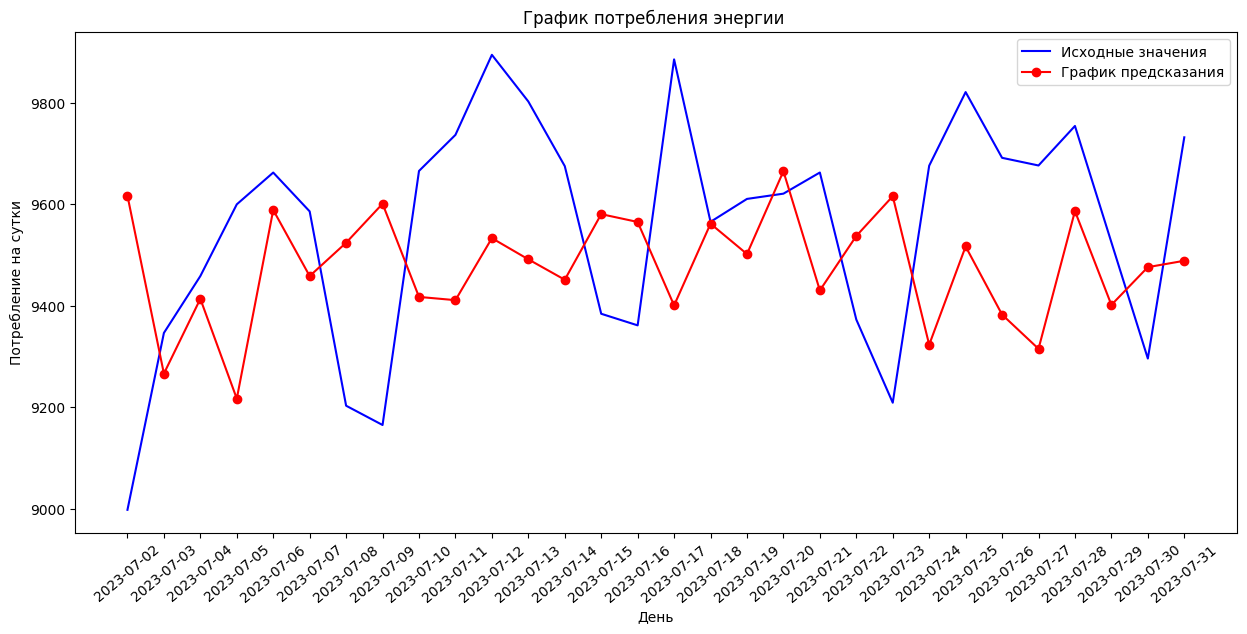

In [73]:
# Предсказанные значения
predicted = forecast['predict']
# Ваши временные индексы (например, временные метки)
X_axis = forecast['date'] 
# Создаем график
plt.figure(figsize=(15, 6.5))
plt.plot(X_axis, target_fact, label='Исходные значения', color='b')
plt.plot(X_axis, predicted, label='График предсказания', color='r', marker='o')
plt.xlabel('День')
plt.xticks(rotation=40)
plt.ylabel("Потребление на сутки")
plt.legend()
plt.title('График потребления энергии ')
plt.show()

In [74]:
# MAPE (Mean Absolute Percentage Error)
def calculate_mape(y_true:pd.Series, y_pred:pd.Series):
    y_true = y_true.to_numpy(copy=True)
    y_pred = y_pred.to_numpy(copy=True)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAPE : {:.2f}%".format(calculate_mape(target_fact, predicted)))
# with random replace MAPE : 2.27%


MAPE : 2.60%


In [75]:
# Вычисление MAE
def show_mae(y1,y2):
    print("Mean Absolute Error (MAE):",mean_absolute_error(y1,y2))

show_mae(target_fact,predicted)
# with random replace Mean Absolute Error (MAE): 216.8549333333336

Mean Absolute Error (MAE): 248.16260000000008
